In [1]:
import scanpy as sc
import scvi
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder


KeyboardInterrupt



In [ ]:
tox_adata = sc.read_h5ad("/project/gilad/jpopp/cellcipher/data/Tox4-full/single_cell_objects/filtered_pflog1ppfnorm.hvg.umap_embedding.h5ad")
tox_adata_raw = sc.read_h5ad("/project/gilad/jpopp/cellcipher/data/Tox4-full/single_cell_objects/filtered.h5ad")

In [ ]:
assert tox_adata.obs.index.equals(tox_adata_raw.obs.index)

In [ ]:
sc.pl.umap(tox_adata, color='leiden')

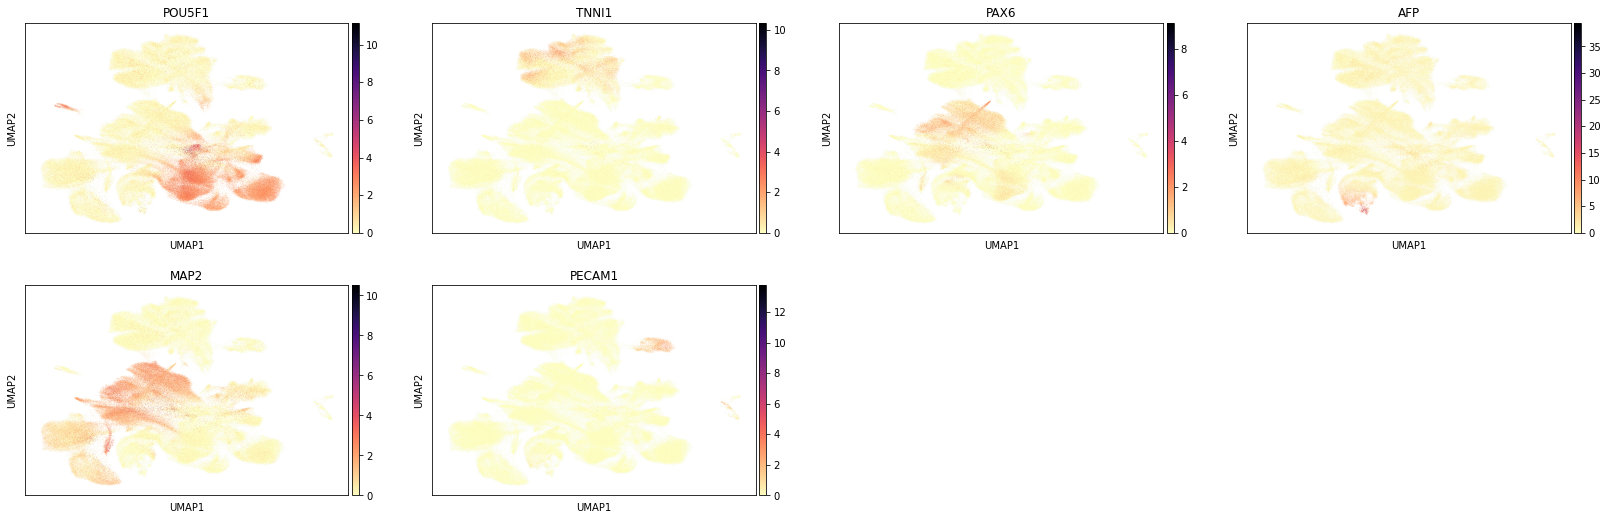

In [5]:
sc.pl.umap(tox_adata, color=['POU5F1', 'TNNI1', 'PAX6', 'AFP', 'MAP2', 'PECAM1'], color_map='magma_r')

In [16]:
celltype_labels = {0: 'mesoderm', 
                   1:'earlyecto', 
                   2: 'pluripotent', 
                   3: 'neuron', 
                   4: 'earlyecto', 
                   5: 'pluripotent',
                   6: 'pluripotent',
                   7: 'endoderm',
                   8: 'neuron',
                   9: 'earlyecto',
                   10: 'endothelial',
                   11: 'pluripotent',
                   12: 'endothelial'}

In [17]:
tox_adata.obs['celltype'] = [celltype_labels[int(c)] for c in tox_adata.obs['leiden']]

In [27]:
treatment_map = {
    '1': 'Pioglitazone',
    '2': 'Pioglitazone',
    '3': 'Aspirin',
    '4': 'Aspirin',
    '5': 'BMS986094',
    '6': 'BMS986094',
    '7': 'Tolcapone',
    '8': 'Tolcapone',
    '9': 'Ximelagatran',
    '10': 'Ximelagatran',
    '11': 'Naloxone',
    '12': 'Naloxone',
    '13': 'Telithromycin',
    '14': 'Telithromycin',
    '15': 'Meclizine',
    '16': 'Meclizine'
}

In [28]:
tox_adata.obs['treatment_name'] = [treatment_map[t] for t in tox_adata.obs['treatment']]

In [29]:
cell_subset = tox_adata.obs[['sample_id', 'donor_id', 'celltype']]
cell_subset['pseudobulk_sample'] = cell_subset['sample_id'].astype(str) + '_' + cell_subset['donor_id'].astype(str) + '_' + cell_subset['celltype'].astype(str)

/tmp/jobs/31465353/ipykernel_46354/782936707.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cell_subset['pseudobulk_sample'] = cell_subset['sample_id'].astype(str) + '_' + cell_subset['donor_id'].astype(str) + '_' + cell_subset['celltype'].astype(str)


In [30]:
onehot = OneHotEncoder(sparse=True).fit_transform(cell_subset[['pseudobulk_sample']])
onehot

<419087x383 sparse matrix of type '<class 'numpy.float64'>'
	with 419087 stored elements in Compressed Sparse Row format>

In [31]:
pseudobulk_sum = tox_adata_raw.X.transpose() * onehot

In [32]:
pseudobulk_sum = pd.DataFrame(pseudobulk_sum.todense(),
                              index=tox_adata_raw.var_names, 
                              columns=cell_subset['pseudobulk_sample'].astype("category").cat.categories).astype(int)

In [37]:
pseudobulk_sum

,YG-KR-16S-821-Tox4-01-1_NA18519_earlyecto,YG-KR-16S-821-Tox4-01-1_NA18519_endoderm,YG-KR-16S-821-Tox4-01-1_NA18519_mesoderm,YG-KR-16S-821-Tox4-01-1_NA18519_neuron,YG-KR-16S-821-Tox4-01-1_NA18519_pluripotent,YG-KR-16S-821-Tox4-01-1_NA18912_earlyecto,YG-KR-16S-821-Tox4-01-1_NA18912_endoderm,YG-KR-16S-821-Tox4-01-1_NA18912_mesoderm,YG-KR-16S-821-Tox4-01-1_NA18912_neuron,YG-KR-16S-821-Tox4-01-1_NA18912_pluripotent,...,YG-KR-16S-821-Tox4-16-16_NA19093_pluripotent,YG-KR-16S-821-Tox4-16-16_NA19204_earlyecto,YG-KR-16S-821-Tox4-16-16_NA19204_mesoderm,YG-KR-16S-821-Tox4-16-16_NA19204_neuron,YG-KR-16S-821-Tox4-16-16_NA19204_pluripotent,YG-KR-16S-821-Tox4-16-16_NA19210_earlyecto,YG-KR-16S-821-Tox4-16-16_NA19210_endoderm,YG-KR-16S-821-Tox4-16-16_NA19210_mesoderm,YG-KR-16S-821-Tox4-16-16_NA19210_neuron,YG-KR-16S-821-Tox4-16-16_NA19210_pluripotent
MIR1302-2HG,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
OR4F5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL627309.1,5,0,15,3,0,12,1,3,1,7,...,7,0,2,0,13,1,0,14,4,5
AL627309.3,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
AL627309.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC136616.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC023491.2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AC007325.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
AC007325.4,11,1,22,10,9,11,0,2,0,22,...,66,0,4,0,16,11,0,28,6,21


In [33]:
pseudobulk_sum.to_csv("/project/gilad/jpopp/cellcipher/data/Tox4-full/pseudobulk_expression.tsv", sep="\t")

In [34]:
treatment_dict = tox_adata.obs[['sample_id', 'treatment', 'treatment_name']].drop_duplicates()

In [35]:
treatment_dict

,sample_id,treatment,treatment_name
cell,,,
AAACCCAAGAGCCTGA-1,YG-KR-16S-821-Tox4-14-14,14,Telithromycin
AAACCCAAGCATTTGC-2,YG-KR-16S-821-Tox4-06-6,6,BMS986094
AAACCCAAGACGGTTG-3,YG-KR-16S-821-Tox4-15-15,15,Meclizine
AAACCCAAGAGTTGCG-4,YG-KR-16S-821-Tox4-12-12,12,Naloxone
AAACCCAAGCCTAGGA-5,YG-KR-16S-821-Tox4-16-16,16,Meclizine
AAACCCAAGCAATTCC-6,YG-KR-16S-821-Tox4-02-2,2,Pioglitazone
AAACCCAAGACGTCCC-7,YG-KR-16S-821-Tox4-04-4,4,Aspirin
AAACCCAAGCGCACAA-8,YG-KR-16S-821-Tox4-11-11,11,Naloxone
AAACCCAAGAAACCAT-9,YG-KR-16S-821-Tox4-08-8,8,Tolcapone


In [36]:
treatment_dict.to_csv("/project/gilad/jpopp/cellcipher/data/Tox4-full/treatment_dict.tsv", sep="\t", index=False)